In [335]:
#Importing the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sn
from matplotlib import pyplot as plt

In [762]:
#Reading the data
url="https://sports.ndtv.com/cricket/icc-rankings/t20-batting"
table=requests.get(url)
soap=BeautifulSoup(table.text)#Using beautiful soup we are converting source code to HTML format.
data=soap.find_all("tr",class_="rnk_tbl-tr")
data

[<tr class="rnk_tbl-tr rnk_tbl-hd"><th class="rnk_tbl-th">Rank</th><th class="rnk_tbl-th rnk_tbl-ply">Player</th><th class="rnk_tbl-th rnk_tx-rt">Rating</th><th class="rnk_tbl-th rnk_tx-rt">Career Best Rating</th></tr>,
 <tr class="rnk_tbl-tr"><td class="rnk_tbl-td">1 </td><td class="rnk_tbl-td"><span class="rnk_tbl-pl"><a class="rnk_tbl-lk" href="/cricket/players/1492-suryakumar-yadav-playerprofile" title="Suryakumar Yadav"><img alt="Suryakumar Yadav" class="lazy rnk_tbl-img" data-src="https://s.ndtvimg.com/images/entities/120/default-player.png" data-srcset="https://s.ndtvimg.com/images/entities/120/default-player.png" height="30" loading="lazy" src="" title="Suryakumar Yadav" width="30"/></a></span> <span class="rnk_tbl-nm"><a href="/cricket/players/1492-suryakumar-yadav-playerprofile" title="Suryakumar Yadav"><span>Suryakumar Yadav</span></a> <span class="rnk_tbl-tm">India</span></span></td><td class="rnk_tbl-td rnk_tx-rt">908</td><td class="rnk_tbl-td rnk_tx-rt">908 v Sri Lanka, 0

In [337]:
#Extracting data and appending into empty lists using loops and RegEX. 
Rank=[]
Players=[]
Team=[]
Rating=[]
Career_bestRat=[]
Opposition=[]
Date=[]
for i in data[1:]:
    Rank.append(i.text.split()[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition.append(b[0])
for i in data[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date.append(b[0])   

In [338]:
#Creating a dataframe from the above extracted data.
data1=pd.DataFrame({"Rank":Rank,"Player":Players,"Team":Team,"Rating":Rating,"CareerBestRating":Career_bestRat,"Opposition":Opposition,"Date":Date})

In [339]:
data1

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,India,908,908,Sri Lanka,07/01/2023
1,2,Mohammad Rizwan,Pakistan,836,875,v England,28/09/2022
2,3,Devon Conway,Zealand,788,831,v Australia,22/10/2022
3,4,Babar Azam,Pakistan,778,896,v England,05/05/2019
4,5,Aiden Markram,Africa,748,796,v England,06/11/2021
...,...,...,...,...,...,...,...
95,96,Dhananjaya de,Lanka,384,401,v Afghanistan,01/11/2022
96,97,Harry Tector,Ireland,383,416,v Afghanistan,09/08/2022
97,98,Muhammad Usman,Emirates,375,490,v Canada,27/10/2019
98,99,Shimron Hetmyer,Indies,374,481,v Australia,06/11/2021


# Data cleaning:
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [340]:
#Removing unecassary values from the dataframe. 
data1["Player"]=data1["Player"].replace({"Netherlands517549 v":"Max ODowd","Mahmudullah Bangladesh452542":"Mahmudullah"})
data1["Team"]=data1["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
data1["Opposition"]=data1["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [341]:
data1

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,India,908,908,v SriLanka,07/01/2023
1,2,Mohammad Rizwan,Pakistan,836,875,v England,28/09/2022
2,3,Devon Conway,New Zealand,788,831,v Australia,22/10/2022
3,4,Babar Azam,Pakistan,778,896,v England,05/05/2019
4,5,Aiden Markram,South Africa,748,796,v England,06/11/2021
...,...,...,...,...,...,...,...
95,96,Dhananjaya de,Sri Lanka,384,401,v Afghanistan,01/11/2022
96,97,Harry Tector,Ireland,383,416,v Afghanistan,09/08/2022
97,98,Muhammad Usman,United Arab Emirates,375,490,v Canada,27/10/2019
98,99,Shimron Hetmyer,West Indies,374,481,v Australia,06/11/2021


In [342]:
#Adding an extra column Style to dataframe.
Style=["RH"]*100

In [343]:
Style.insert(2,"LH")
Style.insert(5,"LH")
Style.insert(7,"LH")
Style.insert(14,"LH")
Style.insert(17,"LH")
Style.insert(19,"LH")
Style.insert(29,"LH")
Style.insert(30,"LH")
Style.insert(32,"LH")
Style.insert(33,"LH")
Style.insert(36,"LH")
Style.insert(38,"LH")
Style.insert(44,"LH")
Style.insert(57,"LH")
Style.insert(62,"LH")
Style.insert(65,"LH")
Style.insert(66,"LH")
Style.insert(70,"LH")
Style.insert(81,"LH")
Style.insert(83,"LH")
Style.insert(97,"LH")

In [344]:
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)
Style.pop(100)

'RH'

In [345]:
data1["Style"]=Style

In [346]:
data1=data1[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]
data1

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,07/01/2023
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,28/09/2022
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,22/10/2022
3,4,Babar Azam,RH,Pakistan,778,896,v England,05/05/2019
4,5,Aiden Markram,RH,South Africa,748,796,v England,06/11/2021
...,...,...,...,...,...,...,...,...
95,96,Dhananjaya de,RH,Sri Lanka,384,401,v Afghanistan,01/11/2022
96,97,Harry Tector,RH,Ireland,383,416,v Afghanistan,09/08/2022
97,98,Muhammad Usman,LH,United Arab Emirates,375,490,v Canada,27/10/2019
98,99,Shimron Hetmyer,RH,West Indies,374,481,v Australia,06/11/2021


In [349]:
#Converting the datatypes in the dataframe.
data1["Rank"]=data1["Rank"].astype(int)
data1["Rating"]=data1["Rating"].astype(int)
data1["CareerBestRating"]=data1["CareerBestRating"].astype(int)
data1["Date"]=pd.to_datetime(data1["Date"])

In [350]:
#checking Datatypes of dataframe.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              100 non-null    int32         
 1   Player            100 non-null    object        
 2   Style             100 non-null    object        
 3   Team              100 non-null    object        
 4   Rating            100 non-null    int32         
 5   CareerBestRating  100 non-null    int32         
 6   Opposition        100 non-null    object        
 7   Date              100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 5.2+ KB


In [351]:
#Exporting to csv file
data1.to_csv("T20_Bat_rank.csv")

In [352]:
#Reading the csv file.
df4=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\T20_Bat_rank.csv")

In [356]:
#Removing uneccasary columns
#df4=df4.drop("Unnamed: 0",axis=1)
df4

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,2022-09-28
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,2022-10-22
3,4,Babar Azam,RH,Pakistan,778,896,v England,2019-05-05
4,5,Aiden Markram,RH,South Africa,748,796,v England,2021-06-11
...,...,...,...,...,...,...,...,...
95,96,Dhananjaya de,RH,Sri Lanka,384,401,v Afghanistan,2022-01-11
96,97,Harry Tector,RH,Ireland,383,416,v Afghanistan,2022-09-08
97,98,Muhammad Usman,LH,United Arab Emirates,375,490,v Canada,2019-10-27
98,99,Shimron Hetmyer,RH,West Indies,374,481,v Australia,2021-06-11


# ODI TOP 100 RANKINGS

In [357]:
url1="https://sports.ndtv.com/cricket/icc-rankings/odi-batting"
ODI=requests.get(url1)
soup1=BeautifulSoup(ODI.text)
ODI1=soup1.find_all("tr",class_="rnk_tbl-tr")

In [358]:
#Extracting data and appending into empty lists using loops and RegEX. 
POS=[]
Players1=[]
Team1=[]
Rating1=[]
Career_bestRat1=[]
Opposition1=[]
Date1=[]
for i in ODI1[1:]:
    POS.append(i.text.split()[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition1.append(b[0])
for i in ODI1[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date1.append(b[0])

In [359]:
#Creating a dataframe from the above extracted data.
datac=pd.DataFrame({"Rank":POS,"Player":Players1,"Team":Team1,"Rating":Rating1,"CareerBestRating":Career_bestRat1,"Opposition":Opposition1,"Date":Date1})

In [360]:
datac

,Rank,Player,Team,Rating,CareerBestRating,Opposition,Date
0,1,Babar Azam,Pakistan,887,898,West Indies,10/06/2022
1,2,Rassie van,Africa,766,796,v England,19/07/2022
2,3,Quinton de,Africa,759,813,Sri Lanka,10/03/2019
3,4,David Warner,Australia,747,880,v Pakistan,26/01/2017
4,5,Pakistan740815 v,Pakistan,740,815,West Indies,12/06/2022
...,...,...,...,...,...,...,...
95,96,Niroshan Dickwella,Lanka,438,518,v Bangladesh,28/05/2021
96,97,Dawid Malan,England,434,491,v Australia,17/11/2022
97,98,Gajanand Singh,USA,433,433,v Namibia,26/11/2022
98,99,Afif Hossain,Bangladesh,432,459,v Zimbabwe,10/08/2022


# Data Cleaning:
Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [361]:
#Removing unecassary values from the dataframe. 
datac["Player"]=datac["Player"].replace({"Mahmudullah Bangladesh591595":"Mahmudullah"," Netherlands443494 v":"Max O'Dowd","Pakistan740815 v":"Imam-ul-Haq"})
datac["Team"]=datac["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
datac["Opposition"]=datac["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [362]:
Style1=["RH"]*100
Style1.insert(2,"LH")
Style1.insert(4,"LH")
Style1.insert(10,"LH")
Style1.insert(17,"LH")
Style1.insert(18,"LH")
Style1.insert(19,"LH")
Style1.insert(26,"LH")
Style1.insert(29,"LH")
Style1.insert(33,"LH")
Style1.insert(37,"LH")
Style1.insert(49,"LH")
Style1.insert(58,"LH")
Style1.insert(63,"LH")
Style1.insert(75,"LH")
Style1.insert(82,"LH")
Style1.insert(94,"LH")
Style1.insert(97,"LH")

In [363]:
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)
Style1.pop(100)

'RH'

In [364]:
#Adding an extra column to the dataframe.
datac["Style"]=Style1
datac=datac[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]

In [366]:
#Converting the datatypes in the dataframe.
datac["Rank"]=datac["Rank"].astype(int)
datac["Rating"]=datac["Rating"].astype(int)
datac["CareerBestRating"]=datac["CareerBestRating"].astype(int)
datac["Date"]=pd.to_datetime(datac["Date"])
datac

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Babar Azam,RH,Pakistan,887,898,v WestIndies,2022-10-06
1,2,Rassie van,RH,South Africa,766,796,v England,2022-07-19
2,3,Quinton de,LH,South Africa,759,813,v SriLanka,2019-10-03
3,4,David Warner,RH,Australia,747,880,v Pakistan,2017-01-26
4,5,Imam-ul-Haq,LH,Pakistan,740,815,v WestIndies,2022-12-06
...,...,...,...,...,...,...,...,...
95,96,Niroshan Dickwella,RH,Sri Lanka,438,518,v Bangladesh,2021-05-28
96,97,Dawid Malan,RH,England,434,491,v Australia,2022-11-17
97,98,Gajanand Singh,LH,USA,433,433,v Namibia,2022-11-26
98,99,Afif Hossain,RH,Bangladesh,432,459,v Zimbabwe,2022-10-08


In [367]:
datac["Team"].unique()

array(['Pakistan', 'South Africa', 'Australia', 'India', 'England',
       'New Zealand', 'Ireland', 'West Indies', 'Bangladesh',
       'Afghanistan', 'Zimbabwe', 'Namibia', 'Sri Lanka', 'Scotland',
       'Guinea', 'USA', 'Oman', 'Netherlands', 'United Arab Emirates',
       'Nepal'], dtype=object)

In [368]:
#Exporting to csv file
datac.to_csv("ODI_Bat_rank.csv")

In [369]:
#Reading csv file
datax=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\ODI_Bat_rank.csv")
datax=datax.drop("Unnamed: 0",axis=1)
datax


,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Babar Azam,RH,Pakistan,887,898,v WestIndies,2022-10-06
1,2,Rassie van,RH,South Africa,766,796,v England,2022-07-19
2,3,Quinton de,LH,South Africa,759,813,v SriLanka,2019-10-03
3,4,David Warner,RH,Australia,747,880,v Pakistan,2017-01-26
4,5,Imam-ul-Haq,LH,Pakistan,740,815,v WestIndies,2022-12-06
...,...,...,...,...,...,...,...,...
95,96,Niroshan Dickwella,RH,Sri Lanka,438,518,v Bangladesh,2021-05-28
96,97,Dawid Malan,RH,England,434,491,v Australia,2022-11-17
97,98,Gajanand Singh,LH,USA,433,433,v Namibia,2022-11-26
98,99,Afif Hossain,RH,Bangladesh,432,459,v Zimbabwe,2022-10-08


# TEST Top 100 Batsman-Rankings

In [370]:
#Reading the data
url2="https://sports.ndtv.com/cricket/icc-rankings/test-batting"
Test=requests.get(url2)
soup2=BeautifulSoup(Test.text)
data2=soup2.find_all("tr",class_="rnk_tbl-tr")
#Extracting data and appending into empty lists using loops and RegEX. 
POS=[]
POS2=[]
Players2=[]
Team2=[]
Rating2=[]
Career_bestRat2=[]
Opposition2=[]
Date2=[]
for i in data2[1:]:
    POS2.append(i.text.split()[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition2.append(b[0])
for i in data2[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date2.append(b[0])

In [371]:
#Creating a dataframe from the above extracted data.
datay=pd.DataFrame({"Rank":POS2,"Player":Players2,"Team":Team2,"Rating":Rating2,"CareerBestRating":Career_bestRat2,"Opposition":Opposition2,"Date":Date2})

In [372]:
Style2=["RH"]*100
Style2.insert(3,"LH")
Style2.insert(6,"LH")
Style2.insert(7,"LH")
Style2.insert(13,"LH")
Style2.insert(18,"LH")
Style2.insert(20,"LH")
Style2.insert(24,"LH")
Style2.insert(25,"LH")
Style2.insert(27,"LH")
Style2.insert(38,"LH")
Style2.insert(41,"LH")
Style2.insert(69,"LH")
Style2.insert(78,"LH")
Style2.insert(83,"LH")
Style2.insert(85,"LH")
Style2.insert(87,"LH")
Style2.insert(97,"LH")

In [373]:
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)
Style2.pop(100)

'RH'

In [374]:
#Adding an extra column to the dataframe.
datay["Style"]=Style2
datay=datay[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]
datay

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Marnus Labuschagne,RH,Australia,929,937,West Indies,12/12/2022
1,2,Steven Smith,RH,Australia,892,947,v England,08/01/2018
2,3,Babar Azam,RH,Pakistan,862,882,New Zealand,30/12/2022
3,4,Travis Head,LH,Australia,841,841,South Africa,08/01/2023
4,5,Joe Root,RH,England,826,923,v India,05/07/2022
...,...,...,...,...,...,...,...,...
95,96,Chris Woakes,RH,England,386,496,v India,13/08/2018
96,97,Roston Chase,RH,Indies,386,626,v Pakistan,14/05/2017
97,98,Dawid Malan,LH,England,383,505,v Australia,08/01/2018
98,99,Marcus Harris,RH,Australia,379,469,Sri Lanka,27/01/2019


In [375]:
#Removing unecassary values from the dataframe. 
datay["Player"]=datay["Player"].replace({"Mahmudullah Bangladesh479574":"Mahmudullah","Pakistan614614 v":"Imam-ul-Haq"})
datay["Team"]=datay["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
datay["Opposition"]=datay["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [377]:
#Cnoverting the datatypes in the dataframe
datay["Rank"]=datay["Rank"].astype(int)
datay["Rating"]=datay["Rating"].astype(int)
datay["CareerBestRating"]=datay["CareerBestRating"].astype(int)
datay["Date"]=pd.to_datetime(datay["Date"])
datay

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Marnus Labuschagne,RH,Australia,929,937,v WestIndies,2022-12-12
1,2,Steven Smith,RH,Australia,892,947,v England,2018-08-01
2,3,Babar Azam,RH,Pakistan,862,882,v NewZealand,2022-12-30
3,4,Travis Head,LH,Australia,841,841,v SouthAfrica,2023-08-01
4,5,Joe Root,RH,England,826,923,v India,2022-05-07
...,...,...,...,...,...,...,...,...
95,96,Chris Woakes,RH,England,386,496,v India,2018-08-13
96,97,Roston Chase,RH,West Indies,386,626,v Pakistan,2017-05-14
97,98,Dawid Malan,LH,England,383,505,v Australia,2018-08-01
98,99,Marcus Harris,RH,Australia,379,469,v SriLanka,2019-01-27


In [378]:
#Exporting to csv file
datay.to_csv("_Bat_rank.csv")

In [379]:
#Reading the csv file
d1=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\TEST_Bat_rank.csv")
d1

,Unnamed: 0,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,0,1,Marnus Labuschagne,RH,Australia,929,937,v WestIndies,2022-12-12
1,1,2,Steven Smith,RH,Australia,892,947,v England,2018-08-01
2,2,3,Babar Azam,RH,Pakistan,862,882,v NewZealand,2022-12-30
3,3,4,Travis Head,LH,Australia,841,841,v SouthAfrica,2023-08-01
4,4,5,Joe Root,RH,England,826,923,v India,2022-05-07
...,...,...,...,...,...,...,...,...,...
95,95,96,Chris Woakes,RH,England,386,496,v India,2018-08-13
96,96,97,Roston Chase,RH,West Indies,386,626,v Pakistan,2017-05-14
97,97,98,Dawid Malan,LH,England,383,505,v Australia,2018-08-01
98,98,99,Marcus Harris,RH,Australia,379,469,v SriLanka,2019-01-27


# T20-Top 100 Bowlers rankings

In [380]:
#Reading the data
url3="https://sports.ndtv.com/cricket/icc-rankings/t20-bowling"
T20BOWL=requests.get(url3)
Soap3=BeautifulSoup(T20BOWL.text)
data3=Soap3.find_all("tr",class_="rnk_tbl-tr")
#Extracting data and appending into empty lists using loops and RegEX. 
POS3=[]
Players3=[]
Team3=[]
Rating3=[]
Career_bestRat3=[]
Opposition3=[]
Date3=[]
for i in data3[1:]:
    POS3.append(i.text.split()[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition3.append(b[0])
for i in data3[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date3.append(b[0])

In [381]:
#Creating a dataframe from the above extracted data.
df=pd.DataFrame({"Rank":POS3,"Player":Players3,"Team":Team3,"Rating":Rating3,"CareerBestRating":Career_bestRat3,"Opposition":Opposition3,"Date":Date3})

In [382]:
Style4=["RA"]*100
Style4.insert(4,"LA")
Style4.insert(16,"LA")
Style4.insert(18,"LA")
Style4.insert(20,"LA")
Style4.insert(25,"LA")
Style4.insert(31,"LA")
Style4.insert(34,"LA")
Style4.insert(35,"LA")
Style4.insert(42,"LA")
Style4.insert(76,"LA")

In [383]:
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)
Style4.pop(100)

'RA'

In [384]:
#Adding an extra column to the dataframe.
df["Style"]=Style4
df=df[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]

# Data Cleaning:

In [385]:
#Removing unecassary values from the dataframe. 
df["Team"]=df["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
df["Opposition"]=df["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [387]:
#Converting the datatypes in the dataframe
df["Rank"]=df["Rank"].astype(int)
df["Rating"]=df["Rating"].astype(int)
df["CareerBestRating"]=df["CareerBestRating"].astype(int)
df["Date"]=pd.to_datetime(df["Date"])
df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Rashid Khan,RA,Afghanistan,698,816,v Bangladesh,2018-05-06
1,2,Wanindu Hasaranga,RA,Sri Lanka,695,797,v WestIndies,2021-04-11
2,3,Adil Rashid,RA,England,692,746,v WestIndies,2022-01-30
3,4,Josh Hazlewood,RA,Australia,690,806,v SriLanka,2022-02-13
4,5,Sam Curran,LA,England,688,688,v Pakistan,2022-11-13
...,...,...,...,...,...,...,...,...
95,96,Mohammed Siraj,RA,India,382,394,v NewZealand,2022-11-22
96,97,Khawar Ali,RA,Oman,382,530,v Canada,2019-10-25
97,98,Junaid Siddique,RA,United Arab Emirates,381,392,v Singapore,2022-08-22
98,99,Nathan Ellis,RA,Australia,380,404,v England,2022-09-10


In [388]:
#Exporting to csv file
df.to_csv("T20_TOP_BOW.csv")

In [389]:
#Reading the csv file
d2=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\T20_TOP_BOW.csv")

# ODI-TOP 100 Bowlers Rankings

In [390]:
#Reading the data.
url3="https://sports.ndtv.com/cricket/icc-rankings/odi-bowling"
y1=requests.get(url3)
soap4=BeautifulSoup(y1.text)
data4=soap4.find_all("tr",class_="rnk_tbl-tr")
#Extracting data and appending into empty lists using loops and RegEX.
POS4=[]
Players4=[]
Team4=[]
Rating4=[]
Career_bestRat4=[]
Opposition4=[]
Date4=[]
for i in data4[1:]:
    POS4.append(i.text.split()[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players4.append(b[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team4.append(b[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating4.append(b[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat4.append(b[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition4.append(b[0])
for i in data4[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date4.append(b[0])

In [391]:
#Creating a dataframe from the above extracted data.
df1=pd.DataFrame({"Rank":POS4,"Player":Players4,"Team":Team4,"Rating":Rating4,"CareerBestRating":Career_bestRat4,"Opposition":Opposition4,"Date":Date4})

In [392]:
Style5=["RA"]*100
Style5.insert(0,"LA")
Style5.insert(3,"LA")
Style5.insert(6,"LA")
Style5.insert(8,"LA")
Style5.insert(9,"LA")
Style5.insert(20,"LA")
Style5.insert(24,"LA")
Style5.insert(61,"LA")
Style5.insert(70,"LA")
Style5.insert(76,"LA")
Style5.insert(89,"LA")
Style5.insert(99,"LA")

In [393]:
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)

'RA'

In [394]:
len(Style5)

100

In [395]:
#Adding an extra column to the dataframe.
df1["Style"]=Style5
df1=df1[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]

# Data Cleaning

In [581]:
#Removing unecassary values from the dataframe. 
df1["Team"]=df1["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
df1["Opposition"]=df1["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [582]:
#Converting the datatypes in the dataframe
df1["Rank"]=df1["Rank"].astype(int)
df1["Rating"]=df1["Rating"].astype(int)
df1["CareerBestRating"]=df1["CareerBestRating"].astype(int)
df1["Date"]=pd.to_datetime(df1["Date"])
df1

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Mohammed Siraj,LA,India,729,736,v NewZealand,2023-01-21
1,2,Josh Hazlewood,RA,Australia,727,733,v England,2018-01-26
2,3,Trent Boult,RA,New Zealand,708,775,v Australia,2022-11-09
3,4,Mitchell Starc,LA,Australia,665,783,v NewZealand,2015-03-29
4,5,Rashid Khan,RA,Afghanistan,659,806,v Pakistan,2018-09-21
...,...,...,...,...,...,...,...,...
95,96,Faheem Ashraf,RA,Pakistan,400,477,v SouthAfrica,2021-02-04
96,97,Khawar Ali,RA,Oman,398,401,v Nepal,2022-09-06
97,98,Sean Abbott,RA,Australia,397,398,v NewZealand,2022-11-09
98,99,Mitchell Marsh,RA,Australia,396,511,v NewZealand,2016-04-12


In [583]:
#Exporting to csv file
df1.to_csv("ODI_TOP_BOW.csv")

In [584]:
#Reading the csv file
d3=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\ODI_TOP_BOW.csv")

# Test-TOP 100 Bowlers Rankings

In [585]:
#Reading the data.
url4="https://sports.ndtv.com/cricket/icc-rankings/test-bowling"
y2=requests.get(url4)
soap5=BeautifulSoup(y2.text)
data5=soap5.find_all("tr",class_="rnk_tbl-tr")
#Extracting data and appending into empty lists using loops and RegEX.
POS5=[]
Players5=[]
Team5=[]
Rating5=[]
Career_bestRat5=[]
Opposition5=[]
Date5=[]
for i in data5[1:]:
    POS5.append(i.text.split()[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"\s(\w+\s\w+)\s",a)
    if len(b)>0:
        Players5.append(b[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"\s(\w+)\d{6}\s",a)
    Team5.append(b[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"(\d{3})\d{3}\s",a)
    Rating5.append(b[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"\d{3}(\d{3})\s",a)
    Career_bestRat5.append(b[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"\w{1}\s(\w+\s\w+)\,",a)
    Opposition5.append(b[0])
for i in data5[1:]:
    a=i.text
    b=re.findall(r"\d{2}\/\d{2}\/\d{4}",a)
    Date5.append(b[0])

In [586]:
#Creating a dataframe from the above extracted data.
df3=pd.DataFrame({"Rank":POS5,"Player":Players5,"Team":Team5,"Rating":Rating5,"CareerBestRating":Career_bestRat5,"Opposition":Opposition5,"Date":Date5})

In [587]:
Style5=["RA"]*100
Style5.insert(5,"LA")
Style5.insert(8,"LA")
Style5.insert(11,"LA")
Style5.insert(18,"LA")
Style5.insert(19,"LA")
Style5.insert(30,"LA")
Style5.insert(47,"LA")
Style5.insert(71,"LA")
Style5.insert(81,"LA")
Style5.insert(96,"LA")

In [588]:
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)
Style5.pop(100)

'RA'

In [589]:
#Adding an extra column to the dataframe.
df3["Style"]=Style5
df3=df3[["Rank","Player","Style","Team","Rating","CareerBestRating","Opposition","Date"]]

# Data cleaning

In [590]:
#Removing unecassary values from the dataframe. 
df3["Team"]=df3["Team"].replace({"Lanka":"Sri Lanka","Indies":"West Indies","Emirates":"United Arab Emirates","Zealand":"New Zealand","Africa":"South Africa"})
df3["Opposition"]=df3["Opposition"].replace({"New Zealand":"v NewZealand","South Africa":"v SouthAfrica","Sri Lanka":"v SriLanka","West Indies":"v WestIndies","Hong Kong":"v HongKong","New Guinea":"v NewGuinea"})

In [592]:
#Converting the datatypes in the dataframe
df3["Rank"]=df3["Rank"].astype(int)
df3["Rating"]=df3["Rating"].astype(int)
df3["CareerBestRating"]=df3["CareerBestRating"].astype(int)
df3["Date"]=pd.to_datetime(df3["Date"])
df3

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Pat Cummins,RA,Australia,878,914,v England,2019-08-18
1,2,James Anderson,RA,England,835,903,v India,2018-08-13
2,3,Jasprit Bumrah,RA,India,812,835,v WestIndies,2019-02-09
3,4,Ravichandran Ashwin,RA,India,812,904,v England,2016-12-12
4,5,Ollie Robinson,RA,England,805,805,v Pakistan,2022-12-21
...,...,...,...,...,...,...,...,...
95,96,Khaled Ahmed,RA,Bangladesh,216,231,v India,2022-12-18
96,97,Mitchell Santner,LA,New Zealand,212,344,v WestIndies,2017-11-12
97,98,Craig Overton,RA,England,210,256,v India,2021-08-29
98,99,Haris Sohail,RA,Pakistan,198,298,v Bangladesh,2020-11-02


In [593]:
#Exporting to csv file
df3.to_csv("TEST_TOP_BOW.csv")

In [594]:
#Reading the csv file.
d4=pd.read_csv(r"C:\Users\RAGHAVENDRA KUMAR\TEST_TOP_BOW.csv")

# Data Analysis:
Data analysis is defined as a process of cleaning, transforming, and modeling data to discover useful information for business decision-making. The purpose of Data Analysis is to extract useful information from data and taking the decision based upon the data analysis.

# Problem Statement:
- To find Which Team players are more in All Three-format Rankings(T20,ODI,TEST).
- To find the relation how  Ranks and thier Rating getting affected.
- To know which Style Players are more in All three format Rankings(RH.LH,RA,LA).

# 1.Univariate Analysis:
Analysing the data using single variable(Single column).

In [595]:
data1

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,2022-09-28
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,2022-10-22
3,4,Babar Azam,RH,Pakistan,778,896,v England,2019-05-05
4,5,Aiden Markram,RH,South Africa,748,796,v England,2021-06-11
...,...,...,...,...,...,...,...,...
95,96,Dhananjaya de,RH,Sri Lanka,384,401,v Afghanistan,2022-01-11
96,97,Harry Tector,RH,Ireland,383,416,v Afghanistan,2022-09-08
97,98,Muhammad Usman,LH,United Arab Emirates,375,490,v Canada,2019-10-27
98,99,Shimron Hetmyer,RH,West Indies,374,481,v Australia,2021-06-11


In [596]:
# We are Using info() to get the entire information about the dataframe.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              100 non-null    int32         
 1   Player            100 non-null    object        
 2   Style             100 non-null    object        
 3   Team              100 non-null    object        
 4   Rating            100 non-null    int32         
 5   CareerBestRating  100 non-null    int32         
 6   Opposition        100 non-null    object        
 7   Date              100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 5.2+ KB


In [597]:
#data1 dataframe contains 100 entries and 8 columns with int,object and datetime64[ns] datatypes.

In [598]:
#Checking the null values.
data1.isnull().sum()

Rank                0
Player              0
Style               0
Team                0
Rating              0
CareerBestRating    0
Opposition          0
Date                0
dtype: int64

In [599]:
#There are no nullvalues in the dataframe.

In [600]:
#Finding the outliers using IQR-Method.
x2=np.percentile(data1["Rating"],[25,50,75])
q1=x2[0]
q2=x2[1]
q3=x2[2]
iqr=q3-q1
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)

In [601]:
data1.loc[data1["Rating"]<lb]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date


In [602]:
data1.loc[data1["Rating"]>ub]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,2022-09-28
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,2022-10-22
3,4,Babar Azam,RH,Pakistan,778,896,v England,2019-05-05


In [603]:
#By using IQR_Method we found that there are 4 outliers in the above dataframe.

# Problem Statement:
    - To find Which Team players are more in All Three-format Ratings(T20,ODI,TEST).
    - To find the relation how  Ranks and thier Rating getting affected.
    - To know which Style Players are more in All three format Rankings(RH.LH,RA,LA).

# Problem Statement:
In t20_ranking dataset find how many batsmans are left-handed batsmans.

In [604]:
data1.loc[data1["Style"]=="LH"].head(10) #head() is used to represent the number of rows specified from the top in dataframe.

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,2022-10-22
5,6,Dawid Malan,LH,England,719,915,v SouthAfrica,2020-01-12
7,8,Rilee Rossouw,LH,South Africa,693,693,v Netherlands,2022-06-11
14,15,Quinton de,LH,South Africa,614,671,v SriLanka,2021-09-14
17,18,Nicholas Pooran,LH,West Indies,582,667,v Bangladesh,2022-07-07
19,20,George Munsey,LH,Scotland,572,600,v Netherlands,2019-09-19
29,30,Litton Das,LH,Bangladesh,541,563,v Zimbabwe,2020-11-03
30,31,Paul Stirling,LH,Ireland,541,599,v UAE,2021-07-10
32,33,Ishan Kishan,LH,India,532,717,v Ireland,2022-06-26
33,34,Kusal Mendis,LH,Sri Lanka,530,530,v India,2023-07-01


In [605]:
len(data1.loc[data1["Style"]=="LH"]) #Here we are using len() to find the length of above filtered dataframe.

21

In [606]:
#There are 21 lefthanded batsmans out of 100 Players. 

In t20_ranking dataset find how many batsmans are Right-handed batsmans.

In [607]:
data1.loc[data1["Style"]=="RH"].head(10)

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,2022-09-28
3,4,Babar Azam,RH,Pakistan,778,896,v England,2019-05-05
4,5,Aiden Markram,RH,South Africa,748,796,v England,2021-06-11
6,7,Glenn Phillips,RH,New Zealand,699,703,v England,2022-01-11
8,9,Aaron Finch,RH,Australia,680,900,v Zimbabwe,2018-03-07
9,10,Alex Hales,RH,England,655,866,v India,2014-07-09
10,11,Jos Buttler,RH,England,652,674,v NewZealand,2021-10-11
11,12,Pathum Nissanka,RH,Sri Lanka,643,698,v Pakistan,2022-09-09
12,13,Virat Kohli,RH,India,631,897,v England,2014-07-09


In [608]:
len(data1.loc[data1["Style"]=="RH"])

79

In [609]:
#There are 21 Rightthanded batsmans out of 100 Players. 

How many Players Belongs to India in T20_Ranking dataset.

In [610]:
data1.loc[data1["Team"]=="India",["Player","Team"]]

,Player,Team
0,Suryakumar Yadav,India
12,Virat Kohli,India
21,KL Rahul,India
23,Rohit Sharma,India
32,Ishan Kishan,India
52,Hardik Pandya,India
59,Shreyas Iyer,India
86,Rishabh Pant,India


In [611]:
len(data1.loc[data1["Team"]=="India"])

8

In [612]:
#There are 8 Players in the above data belongs to india.

How many Players CareerBestRatings are greater than 800 in Test_Ranking dataset.

In [613]:
datay.loc[datay["CareerBestRating"]>800,["Player","CareerBestRating"]]

,Player,CareerBestRating
0,Marnus Labuschagne,937
1,Steven Smith,947
2,Babar Azam,882
3,Travis Head,841
4,Joe Root,923
5,Kane Williamson,919
6,Rishabh Pant,801
9,Rohit Sharma,813
13,David Warner,880
14,Virat Kohli,937


In [614]:
len(datay.loc[datay["CareerBestRating"]>800])

14

In [615]:
#There are 14 players whose Careerbestrating is >800 ind test_rankings.

How many Players Ratings are greater than 800 in ODI_Ranking dataset.

In [616]:
datac.loc[datac["Rating"]>800,["Player","Rating"]]

,Player,Rating
0,Babar Azam,887


In [617]:
len(datac.loc[datac["Rating"]>800])

1

In [618]:
#There is only 1 player in ODI_Ranking whose rating is >800.

Display the names of Players whose Ranks are below 10 in Test_Bowl_Ranking.

In [619]:
df3.loc[df3["Rank"]<10,["Player"]]

,Player
0,Pat Cummins
1,James Anderson
2,Jasprit Bumrah
3,Ravichandran Ashwin
4,Ollie Robinson
5,Shaheen Afridi
6,Kagiso Rabada
7,Kyle Jamieson
8,Mitchell Starc


How many players belongs to England in ODI_BOwl_Rankings.

In [620]:
df1.loc[df1["Team"]=="England",["Player",'Team']]

,Player,Team
10,Chris Woakes,England
24,David Willey,England
35,Mark Wood,England
43,Adil Rashid,England
68,Reece Topley,England
74,Moeen Ali,England
93,Saqib Mahmood,England


In [621]:
len(df1.loc[df1["Team"]=="England"])

7

In [622]:
#There are 7 players belongs to England in ODI_bowling rankings.

# Bivariate Analysis:
Analysing the data using two variables(two columns).

# Problem Statement:
In t20 rankings dataset find how many players belongs to india and there rating is above 500.

In [623]:
data1.loc[(data1["Team"]=="India") & (data1["Rating"]>500),["Player"]]

,Player
0,Suryakumar Yadav
12,Virat Kohli
21,KL Rahul
23,Rohit Sharma
32,Ishan Kishan


In [624]:
len(data1.loc[(data1["Team"]=="India") & (data1["Rating"]>500),["Player"]])

5

In [625]:
#There are 5 players in india whose raing is >500. in t20_rankings.

In ODI rankings dataset find how many players belongs to india and there rating is above 500.

In [626]:
datac.loc[(datac["Team"]=="India") & (datac["Rating"]>500),["Player"]]

,Player
5,Shubman Gill
6,Virat Kohli
8,Rohit Sharma
18,Shreyas Iyer
31,Shikhar Dhawan
42,KL Rahul
44,Ishan Kishan


In [627]:
len(datac.loc[(datac["Team"]=="India") & (datac["Rating"]>500),["Player"]])

7

In [628]:
#There are 7 players in india whose ratings ara >500 in ODI_rankings.

Display the names of Bowlers belongs to England  and ranks are below 30 in ODI_Bowl-Rankings.

In [629]:
df1.loc[(df1["Team"]=="England") & (df1["Rank"]<30),["Rank","Player"]]

,Rank,Player
10,11,Chris Woakes
24,25,David Willey


In [630]:
#Chris Woakes, David Willey are the two bowlers belongs to England and there ranks are below 30.

Find how many Players belongs to Australia whose rating is greater than 600 in Test_Bowl ranking.

In [631]:
df3.loc[(df3["Team"]=="Australia") & (df3["Rating"]>600),["Player","Rating"]]

,Player,Rating
0,Pat Cummins,878
8,Mitchell Starc,749
9,Josh Hazlewood,733
13,Nathan Lyon,713


In [632]:
len(df3.loc[(df3["Team"]=="Australia") & (df3["Rating"]>600),["Player","Rating"]])

4

In [633]:
#There are 4 players in Australia whose rating is greater than 600 in Test_bowling rankings.

Find how many Players belongs to India whose rating is greater than 600 in Test_Bowl ranking.

In [634]:
df3.loc[(df3["Team"]=="India") & (df3["Rating"]>600),["Player","Rating"]]

,Player,Rating
2,Jasprit Bumrah,812
3,Ravichandran Ashwin,812
17,Mohammad Shami,657
18,Axar Patel,639
19,Ravindra Jadeja,639


In [635]:
len(df3.loc[(df3["Team"]=="India") & (df3["Rating"]>600),["Player","Rating"]])

5

In [636]:
#There are 5 players in India whose rating is greater than 600 in Test_bowling rankings.

Find how many Players belongs to England whose rating is greater than 600 in Test_Bowl ranking.

In [637]:
df3.loc[(df3["Team"]=="England") & (df3["Rating"]>600),["Player","Rating"]]

,Player,Rating
1,James Anderson,835
4,Ollie Robinson,805
15,Stuart Broad,712


In [638]:
len(df3.loc[(df3["Team"]=="England") & (df3["Rating"]>600),["Player","Rating"]])

3

In [639]:
#There are 3 players in England whose rating is greater than 600 in Test_bowling rankings.

Display the names of Players whose rating is greater than 600 and CareerbestRating is greaterthan 750 in Test_rankings.

In [640]:
datay.loc[(datay["Rating"]>600) & (datay["CareerBestRating"]>750),["Player","Rating","CareerBestRating"]]

,Player,Rating,CareerBestRating
0,Marnus Labuschagne,929,937
1,Steven Smith,892,947
2,Babar Azam,862,882
3,Travis Head,841,841
4,Joe Root,826,923
5,Kane Williamson,810,919
6,Rishabh Pant,797,801
7,Usman Khawaja,770,779
8,Dimuth Karunaratne,748,782
9,Rohit Sharma,732,813


In [641]:
# The players are Marnus Labuschagne,Steven Smith,Babar Azam,Travis Head,Joe Root,Kane Williamson,Rishabh Pant,Usman Khawaja,Dimuth Karunaratne,Rohit Sharma,Jonny Bairstow,David Warner,Virat Kohli,Dinesh ChandimalAngelo Mathews,Cheteshwar Pujara,Ben Stokes

Find how many players belongs to Newzealand whose rating is greater than 500 in ODI_Rankings.

In [642]:
datac.loc[(datac["Team"]=="New Zealand") & (datac["Rating"]>500),["Player"]]

,Player
10,Kane Williamson
26,Tom Latham
32,Martin Guptill
36,Devon Conway


In [643]:
len(datac.loc[(datac["Team"]=="New Zealand") & (datac["Rating"]>500)])

4

In [644]:
#There are 4 players belongs to Newzealand in ODI_rankings.

# Multivariate Analysis:
Analysing the data using more than two columns.

find how many players belongs to India,Rating>600 and there ranks must be less than 15.

In [645]:
data1.loc[(data1["Team"]=="India") & (data1["Rank"]<15) & (data1["Rating"]>600)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
12,13,Virat Kohli,RH,India,631,897,v England,2014-07-09


In [646]:
len(data1.loc[(data1["Team"]=="India") & (data1["Rank"]<15) & (data1["Rating"]>600)])

2

In [647]:
#There are 2 players in india whose rating is greaterthan 600 in T20_rankings. 

find how many players belongs to England,Rating>600 and there ranks must be less than 15.

In [648]:
data1.loc[(data1["Team"]=="England") & (data1["Rank"]<15) & (data1["Rating"]>600)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
5,6,Dawid Malan,LH,England,719,915,v SouthAfrica,2020-01-12
9,10,Alex Hales,RH,England,655,866,v India,2014-07-09
10,11,Jos Buttler,RH,England,652,674,v NewZealand,2021-10-11


In [649]:
len(data1.loc[(data1["Team"]=="England") & (data1["Rank"]<15) & (data1["Rating"]>600)])

3

In [650]:
#There are 3 players in England whose rating is greaterthan 600 in T20_rankings. 

find how many players belongs to Australia,Rating>600 and there ranks must be less than 15

In [651]:
data1.loc[(data1["Team"]=="Australia") & (data1["Rank"]<15) & (data1["Rating"]>600)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
8,9,Aaron Finch,RH,Australia,680,900,v Zimbabwe,2018-03-07


In [652]:
len(data1.loc[(data1["Team"]=="Australia") & (data1["Rank"]<15) & (data1["Rating"]>600)])

1

In [653]:
#There is only 1 player in Austraila whose rating is greaterthan 600 in T20_rankings. 

find how many players belongs to South Afric,Rating>600 and there ranks must be less than 15.

In [654]:
data1.loc[(data1["Team"]=="South Africa") & (data1["Rank"]<15) & (data1["Rating"]>600)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
4,5,Aiden Markram,RH,South Africa,748,796,v England,2021-06-11
7,8,Rilee Rossouw,LH,South Africa,693,693,v Netherlands,2022-06-11


In [655]:
len(data1.loc[(data1["Team"]=="South Africa") & (data1["Rank"]<15) & (data1["Rating"]>600)])

2

In [656]:
#There are 2 players in South Africa whose rating is greaterthan 600 in T20_rankings. 

Find how many Players are Righthanded belongs to india and Rank is below 20 and there  CareerBestrating>600 against oppostion Srilanka. 

In [657]:
data1.loc[(data1["Style"]=="RH") & (data1["Rank"]<20) & (data1["Rating"]>600) & (data1["Opposition"]=="v SriLanka") & (data1["Team"]=="India")]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01


In [658]:
len(data1.loc[(data1["Style"]=="RH") & (data1["Rank"]<20) & (data1["Rating"]>600) & (data1["Opposition"]=="v SriLanka") & (data1["Team"]=="India")])

1

In [659]:
#Only 1 player in india whose rank is below 20 and rating>600 versus oppostion V Srilanka.

How many Players belongs to Austraila whose rating is above 500 and rank is below 20 in T20_Bowl rankings.

In [660]:
df.loc[(df["Team"]=="Australia") & (df["Rating"]>500) & (df["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
3,4,Josh Hazlewood,RA,Australia,690,806,v SriLanka,2022-02-13
6,7,Adam Zampa,RA,Australia,678,743,v SriLanka,2022-11-02


In [661]:
len(df.loc[(df["Team"]=="Australia") & (df["Rating"]>500) & (df["Rank"]<20)])

2

In [662]:
#There are 2 players in Austraila whose Rating>500 and rank is below 500.

How many players are in india whose rating is above 600 in All three formats ODI,T20 and Test_rankings.    

In [663]:
data1.loc[(data1["Team"]=="India") & (data1["Rating"]>600),["Player","Rating"]]

,Player,Rating
0,Suryakumar Yadav,908
12,Virat Kohli,631


In [664]:
datac.loc[(datac["Team"]=="India") & (datac["Rating"]>600),["Player","Rating"]]

,Player,Rating
5,Shubman Gill,734
6,Virat Kohli,727
8,Rohit Sharma,719
18,Shreyas Iyer,643


In [665]:
datay.loc[(datay["Team"]=="India") & (datay["Rating"]>600),["Player","Rating"]]

,Player,Rating
6,Rishabh Pant,797
9,Rohit Sharma,732
14,Virat Kohli,676
17,Shreyas Iyer,666
21,Cheteshwar Pujara,642
26,Mayank Agarwal,631


In [666]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(data1.loc[(data1["Team"]=="India") & (data1["Rating"]>600),["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(datac.loc[(datac["Team"]=="India") & (datac["Rating"]>600),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(datay.loc[(datay["Team"]=="India") & (datay["Rating"]>600),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :2
The number of players in ODI_rankings whose rating is above 600 are :4
The number of players in Test_rankings whose rating is above 600 are :6


In [667]:
#The number of players in T20,ODI and TEST_Rankings whose rating is above 600 in India are:
#1.In T20_rankings-2
#2.In ODI_rankings-5
#3.In Test_rankings-6

How many players are in Australia whose rating is above 600 in All three formats ODI,T20 and Test_rankings.

In [668]:
data1.loc[(data1["Team"]=="Australia") & (data1["Rating"]>600),["Player","Rating"]]

,Player,Rating
8,Aaron Finch,680


In [669]:
datac.loc[(datac["Team"]=="Australia") & (datac["Rating"]>600),["Player","Rating"]]

,Player,Rating
3,David Warner,747
7,Steven Smith,719
20,Alex Carey,635
21,Aaron Finch,635
23,Glenn Maxwell,632
27,Travis Head,610


In [670]:
datay.loc[(datay["Team"]=="Australia") & (datay["Rating"]>600),["Player","Rating"]]

,Player,Rating
0,Marnus Labuschagne,929
1,Steven Smith,892
3,Travis Head,841
7,Usman Khawaja,770
13,David Warner,680
27,Alex Carey,628


In [671]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(data1.loc[(data1["Team"]=="Australia") & (data1["Rating"]>600),["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(datac.loc[(datac["Team"]=="Australia") & (datac["Rating"]>600),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(datay.loc[(datay["Team"]=="Australia") & (datay["Rating"]>600),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :1
The number of players in ODI_rankings whose rating is above 600 are :6
The number of players in Test_rankings whose rating is above 600 are :6


In [672]:
#The number of players in T20,ODI and TEST_Rankings whose rating is above 600 in Australia are:
#1.In T20_rankings-1
#2.In ODI_rankings-6
#3.In Test_rankings-6

How many players are in England whose rating is above 600 in All three formats ODI,T20 and Test_rankings.

In [673]:
data1.loc[(data1["Team"]=="England") & (data1["Rating"]>600),["Player","Rating"]]

,Player,Rating
5,Dawid Malan,719
9,Alex Hales,655
10,Jos Buttler,652


In [674]:
datac.loc[(datac["Team"]=="England") & (datac["Rating"]>600),["Player","Rating"]]

,Player,Rating
9,Jonny Bairstow,710
14,Joe Root,670
17,Jason Roy,649
29,Jos Buttler,607


In [675]:
datay.loc[(datay["Team"]=="England") & (datay["Rating"]>600),["Player","Rating"]]

,Player,Rating
4,Joe Root,826
12,Jonny Bairstow,697
25,Ben Stokes,633
28,Ollie Pope,621


In [676]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(data1.loc[(data1["Team"]=="England") & (data1["Rating"]>600),["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(datac.loc[(datac["Team"]=="England") & (datac["Rating"]>600),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(datay.loc[(datay["Team"]=="England") & (datay["Rating"]>600),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :3
The number of players in ODI_rankings whose rating is above 600 are :4
The number of players in Test_rankings whose rating is above 600 are :4


In [677]:
#The number of players in T20,ODI and TEST_Rankings whose rating is above 600 in England are:
#1.In T20_rankings-3
#2.In ODI_rankings-4
#3.In Test_rankings-4

How many players are in Newzealand whose rating is above 600 in All three formats ODI,T20 and Test_rankings.

In [684]:
data1.loc[(data1["Team"]=="New Zealand") & (data1["Rating"]>600),["Player","Rating"]]

,Player,Rating
2,Devon Conway,788
6,Glenn Phillips,699


In [685]:
datac.loc[(data1["Team"]=="New Zealand") & (datac["Rating"]>600),["Player","Rating"]]

,Player,Rating
2,Quinton de,759
6,Virat Kohli,727
22,Mushfiqur Rahim,635
26,Tom Latham,614


In [686]:
datay.loc[(datay["Team"]=="New Zealand") & (datay["Rating"]>600),["Player","Rating"]]

,Player,Rating
5,Kane Williamson,810
10,Daryl Mitchell,712
16,Tom Blundell,671
18,Tom Latham,654
20,Devon Conway,646


In [687]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(data1.loc[(data1["Team"]=="New Zealand") & (data1["Rating"]>600),["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(datac.loc[(datac["Team"]=="New Zealand") & (datac["Rating"]>600),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(datay.loc[(datay["Team"]=="New Zealand") & (datay["Rating"]>600),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :2
The number of players in ODI_rankings whose rating is above 600 are :2
The number of players in Test_rankings whose rating is above 600 are :5


In [688]:
#The number of players in T20,ODI and TEST_Rankings whose rating is above 600 in NewZealand are:
#1.In T20_rankings-2
#2.In ODI_rankings-3
#3.In Test_rankings-5

How many Bowlers are in Newzealand whose rating is above 600 and rank is below 20 in All three formats ODI,T20 and Test_rankings.

In [689]:
df.loc[(df["Team"]=="New Zealand") & (df["Rating"]>600) & (df["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
10,11,Mitchell Santner,RA,New Zealand,640,731,v Pakistan,2018-01-22
12,13,Tim Southee,RA,New Zealand,633,669,v Bangladesh,2021-01-04
18,19,Trent Boult,LA,New Zealand,628,653,v SriLanka,2022-10-29


In [690]:
df1.loc[(df1["Team"]=="New Zealand") & (df1["Rating"]>600) & (df1["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
2,3,Trent Boult,RA,New Zealand,708,775,v Australia,2022-11-09
14,15,Matt Henry,RA,New Zealand,624,691,v Bangladesh,2021-03-26


In [691]:
df3.loc[(df3["Team"]=="New Zealand") & (df3["Rating"]>600) & (df3["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
7,8,Kyle Jamieson,RA,New Zealand,772,836,v England,2022-06-06
11,12,Trent Boult,LA,New Zealand,724,825,v England,2015-05-25
12,13,Neil Wagner,RA,New Zealand,716,859,v Australia,2020-12-30
14,15,Tim Southee,RA,New Zealand,712,839,v India,2021-11-29


In [692]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(df.loc[(df["Team"]=="New Zealand") & (df["Rating"]>600) & (df["Rank"]<20) ,["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(df1.loc[(df1["Team"]=="New Zealand") & (df1["Rating"]>600) & (df1["Rank"]<20),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(df3.loc[(df3["Team"]=="New Zealand") & (df3["Rating"]>600) & (df3["Rank"]<20),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :3
The number of players in ODI_rankings whose rating is above 600 are :2
The number of players in Test_rankings whose rating is above 600 are :4


In [693]:
#The number of Bowlers in T20,ODI and TEST_Rankings whose rating is above 600 in NewZealand are:
#1.In T20_rankings-3
#2.In ODI_rankings-0
#3.In Test_rankings-0

How many Bowlers are in India whose rating is above 600 and rank is below 20 in All three formats ODI,T20 and Test_rankings.

In [694]:
df.loc[(df["Team"]=="India") & (df["Rating"]>600) & (df["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
17,18,Bhuvneshwar Kumar,RA,India,628,682,v Afghanistan,2022-08-09


In [695]:
df1.loc[(df1["Team"]=="India") & (df1["Rating"]>600) & (df1["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Mohammed Siraj,LA,India,729,736,v NewZealand,2023-01-21


In [696]:
df3.loc[(df3["Team"]=="India") & (df3["Rating"]>600) & (df3["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
2,3,Jasprit Bumrah,RA,India,812,835,v WestIndies,2019-02-09
3,4,Ravichandran Ashwin,RA,India,812,904,v England,2016-12-12
17,18,Mohammad Shami,RA,India,657,790,v Bangladesh,2019-11-16
18,19,Axar Patel,LA,India,639,650,v Bangladesh,2022-12-18


In [697]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(df.loc[(df["Team"]=="India") & (df["Rating"]>600) & (df["Rank"]<20) ,["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(df1.loc[(df1["Team"]=="India") & (df1["Rating"]>600) & (df1["Rank"]<20),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(df3.loc[(df3["Team"]=="India") & (df3["Rating"]>600) & (df3["Rank"]<20),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :1
The number of players in ODI_rankings whose rating is above 600 are :1
The number of players in Test_rankings whose rating is above 600 are :4


In [698]:
#The number of Bowlers in T20,ODI and TEST_Rankings whose rating is above 600 in India are:
#1.In T20_rankings-1
#2.In ODI_rankings-1
#3.In Test_rankings-4

How many Bowlers are in Australia whose rating is above 600 and rank is below 20 in All three formats ODI,T20 and Test_rankings.

In [699]:
df.loc[(df["Team"]=="Australia") & (df["Rating"]>600) & (df["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
3,4,Josh Hazlewood,RA,Australia,690,806,v SriLanka,2022-02-13
6,7,Adam Zampa,RA,Australia,678,743,v SriLanka,2022-11-02


In [700]:
df1.loc[(df1["Team"]=="Australia") & (df1["Rating"]>600) & (df1["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
1,2,Josh Hazlewood,RA,Australia,727,733,v England,2018-01-26
3,4,Mitchell Starc,LA,Australia,665,783,v NewZealand,2015-03-29
5,6,Adam Zampa,RA,Australia,655,655,v England,2022-11-22
15,16,Pat Cummins,RA,Australia,615,729,v Pakistan,2019-12-06


In [701]:
df3.loc[(df3["Team"]=="Australia") & (df3["Rating"]>600) & (df3["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Pat Cummins,RA,Australia,878,914,v England,2019-08-18
8,9,Mitchell Starc,LA,Australia,749,806,v NewZealand,2019-12-16
9,10,Josh Hazlewood,RA,Australia,733,863,v India,2017-07-03
13,14,Nathan Lyon,RA,Australia,713,774,v England,2017-06-12


In [702]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(df.loc[(df["Team"]=="Australia") & (df["Rating"]>600) & (df["Rank"]<20) ,["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(df1.loc[(df1["Team"]=="Australia") & (df1["Rating"]>600) & (df1["Rank"]<20),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(df3.loc[(df3["Team"]=="Australia") & (df3["Rating"]>600) & (df3["Rank"]<20),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :2
The number of players in ODI_rankings whose rating is above 600 are :4
The number of players in Test_rankings whose rating is above 600 are :4


In [703]:
#The number of Bowlers in T20,ODI and TEST_Rankings whose rating is above 600 in Australia are:
#1.In T20_rankings-2
#2.In ODI_rankings-4
#3.In Test_rankings-4

How many Bowlers are in England whose rating is above 600 and rank is below 20 in All three formats ODI,T20 and Test_rankings.

In [704]:
df.loc[(df["Team"]=="England") & (df["Rating"]>600) & (df["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
2,3,Adil Rashid,RA,England,692,746,v WestIndies,2022-01-30
4,5,Sam Curran,LA,England,688,688,v Pakistan,2022-11-13


In [705]:
df1.loc[(df1["Team"]=="England") & (df1["Rating"]>600) & (df1["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
10,11,Chris Woakes,RA,England,632,711,v SriLanka,2021-04-07


In [706]:
df3.loc[(df3["Team"]=="England") & (df3["Rating"]>600) & (df3["Rank"]<20)]

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
1,2,James Anderson,RA,England,835,903,v India,2018-08-13
4,5,Ollie Robinson,RA,England,805,805,v Pakistan,2022-12-21
15,16,Stuart Broad,RA,England,712,880,v SouthAfrica,2016-01-18


In [707]:
print("The number of players in T20_rankings whose rating is above 600 are :{}".format(len(df.loc[(df["Team"]=="England") & (df["Rating"]>600) & (df["Rank"]<20) ,["Player","Rating"]])))
print("The number of players in ODI_rankings whose rating is above 600 are :{}".format(len(df1.loc[(df1["Team"]=="England") & (df1["Rating"]>600) & (df1["Rank"]<20),["Player","Rating"]])))
print("The number of players in Test_rankings whose rating is above 600 are :{}".format(len(df3.loc[(df3["Team"]=="England") & (df3["Rating"]>600) & (df3["Rank"]<20),["Player","Rating"]])))

The number of players in T20_rankings whose rating is above 600 are :2
The number of players in ODI_rankings whose rating is above 600 are :1
The number of players in Test_rankings whose rating is above 600 are :3


In [708]:
#The number of Bowlers in T20,ODI and TEST_Rankings whose rating is above 600 in England are:
#1.In T20_rankings-2
#2.In ODI_rankings-1
#3.In Test_rankings-3

In [709]:
g=data1.groupby("Style")
g

In [710]:
#groupby() divides the given column into two groups and gives the groupby object.

In [711]:
g.get_group("RH")

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Suryakumar Yadav,RH,India,908,908,v SriLanka,2023-07-01
1,2,Mohammad Rizwan,RH,Pakistan,836,875,v England,2022-09-28
3,4,Babar Azam,RH,Pakistan,778,896,v England,2019-05-05
4,5,Aiden Markram,RH,South Africa,748,796,v England,2021-06-11
6,7,Glenn Phillips,RH,New Zealand,699,703,v England,2022-01-11
...,...,...,...,...,...,...,...,...
94,95,Vriitya Aravind,RH,United Arab Emirates,386,423,v Singapore,2022-08-22
95,96,Dhananjaya de,RH,Sri Lanka,384,401,v Afghanistan,2022-01-11
96,97,Harry Tector,RH,Ireland,383,416,v Afghanistan,2022-09-08
98,99,Shimron Hetmyer,RH,West Indies,374,481,v Australia,2021-06-11


In [712]:
g.get_group("LH")

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
2,3,Devon Conway,LH,New Zealand,788,831,v Australia,2022-10-22
5,6,Dawid Malan,LH,England,719,915,v SouthAfrica,2020-01-12
7,8,Rilee Rossouw,LH,South Africa,693,693,v Netherlands,2022-06-11
14,15,Quinton de,LH,South Africa,614,671,v SriLanka,2021-09-14
17,18,Nicholas Pooran,LH,West Indies,582,667,v Bangladesh,2022-07-07
19,20,George Munsey,LH,Scotland,572,600,v Netherlands,2019-09-19
29,30,Litton Das,LH,Bangladesh,541,563,v Zimbabwe,2020-11-03
30,31,Paul Stirling,LH,Ireland,541,599,v UAE,2021-07-10
32,33,Ishan Kishan,LH,India,532,717,v Ireland,2022-06-26
33,34,Kusal Mendis,LH,Sri Lanka,530,530,v India,2023-07-01


In [713]:
#There are groups one RH style and other is LH style.

In [714]:
#To find the statistical measures of LH and RH groups we are using describe mrthod.
g.describe()

Rank                                                     Rating  \
      count       mean        std  min   25%   50%   75%    max  count   
Style                                                                    
LH     21.0  43.238095  27.768516  3.0  20.0  37.0  66.0   98.0   21.0   
RH     79.0  52.430380  29.199000  1.0  26.5  53.0  77.5  100.0   79.0   

                   ...               CareerBestRating                          \
             mean  ...    75%    max            count        mean         std   
Style              ...                                                          
LH     527.238095  ...  572.0  788.0             21.0  625.571429  132.067623   
RH     500.759494  ...  555.0  908.0             79.0  577.000000  145.972864   

                                          
         min    25%    50%    75%    max  
Style                                     
LH     398.0  530.0  600.0  693.0  915.0  
RH     393.0  476.5  525.0  660.5  908.0  

[2 rows x 24 columns]

In [715]:
#We can observe that the averagevalue for ranks of RH style batsmans is more compared to LH style batsmans.
#The average value of Rating for LH is more compared to RH style batsmans.

Find the total number of players whose Rank is below 20,rating is above 600 and belongs to india in all three formats.

In [716]:
#We are using concat() to merge morethan two dataframes.
final_df=pd.concat([df,df1,df3,data1,datac,datay],ignore_index=True)
final_df

,Rank,Player,Style,Team,Rating,CareerBestRating,Opposition,Date
0,1,Rashid Khan,RA,Afghanistan,698,816,v Bangladesh,2018-05-06
1,2,Wanindu Hasaranga,RA,Sri Lanka,695,797,v WestIndies,2021-04-11
2,3,Adil Rashid,RA,England,692,746,v WestIndies,2022-01-30
3,4,Josh Hazlewood,RA,Australia,690,806,v SriLanka,2022-02-13
4,5,Sam Curran,LA,England,688,688,v Pakistan,2022-11-13
...,...,...,...,...,...,...,...,...
595,96,Chris Woakes,RH,England,386,496,v India,2018-08-13
596,97,Roston Chase,RH,West Indies,386,626,v Pakistan,2017-05-14
597,98,Dawid Malan,LH,England,383,505,v Australia,2018-08-01
598,99,Marcus Harris,RH,Australia,379,469,v SriLanka,2019-01-27


In [717]:
len(final_df.loc[(final_df["Team"]=="Pakistan") & (final_df["Rating"]>200),["Rank","Player","Team","Rating"]])

49

In [718]:
len(final_df.loc[(final_df["Team"]=="India") & (final_df["Rating"]>200),["Rank","Player","Team","Rating"]])

61

In [719]:
len(final_df.loc[(final_df["Team"]=="Australia") & (final_df["Rating"]>200),["Rank","Player","Team","Rating"]])

49

In [720]:
len(final_df.loc[(final_df["Team"]=="England") & (final_df["Rating"]>200),["Rank","Player","Team","Rating"]])

59

In [721]:
len(final_df.loc[(final_df["Team"]=="Afghanistan") & (final_df["Rating"]>200),["Rank","Player","Team","Rating"]])

26

In [722]:
final_df.loc[(final_df["Team"]=="India") & (final_df["Rating"]>600) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
17,18,Bhuvneshwar Kumar,India,628
100,1,Mohammed Siraj,India,729
202,3,Jasprit Bumrah,India,812
203,4,Ravichandran Ashwin,India,812
217,18,Mohammad Shami,India,657
218,19,Axar Patel,India,639
300,1,Suryakumar Yadav,India,908
312,13,Virat Kohli,India,631
405,6,Shubman Gill,India,734
406,7,Virat Kohli,India,727


In [763]:
final_df.loc[(final_df["Team"]=="India") & (final_df["Rating"]>750) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
202,3,Jasprit Bumrah,India,812
203,4,Ravichandran Ashwin,India,812
300,1,Suryakumar Yadav,India,908
506,7,Rishabh Pant,India,797


In [723]:
len(final_df.loc[(final_df["Team"]=="India") & (final_df["Rating"]>600) & (final_df["Rank"]<20)])

16

In [724]:
#There are total 15 players in india whose rank is <20 and rating is >600 belongs to india in all formats.

Find the total number of players whose Rank is below 20,rating is above 600 and belongs to England in all three formats.

In [725]:
final_df.loc[(final_df["Team"]=="England") & (final_df["Rating"]>600) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
2,3,Adil Rashid,England,692
4,5,Sam Curran,England,688
110,11,Chris Woakes,England,632
201,2,James Anderson,England,835
204,5,Ollie Robinson,England,805
215,16,Stuart Broad,England,712
305,6,Dawid Malan,England,719
309,10,Alex Hales,England,655
310,11,Jos Buttler,England,652
409,10,Jonny Bairstow,England,710


In [726]:
len(final_df.loc[(final_df["Team"]=="England") & (final_df["Rating"]>600) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]])

14

In [727]:
#There are total 14 players in india whose rank is <20 and rating is >600 belongs to England in all formats.

Find the total number of players whose Rank is below 20,rating is above 600 and belongs to Australia in all three formats.

In [728]:
final_df.loc[(final_df["Team"]=="Australia") & (final_df["Rating"]>600) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]]

,Rank,Player,Team,Rating
3,4,Josh Hazlewood,Australia,690
6,7,Adam Zampa,Australia,678
101,2,Josh Hazlewood,Australia,727
103,4,Mitchell Starc,Australia,665
105,6,Adam Zampa,Australia,655
115,16,Pat Cummins,Australia,615
200,1,Pat Cummins,Australia,878
208,9,Mitchell Starc,Australia,749
209,10,Josh Hazlewood,Australia,733
213,14,Nathan Lyon,Australia,713


In [729]:
len(final_df.loc[(final_df["Team"]=="Australia") & (final_df["Rating"]>600) & (final_df["Rank"]<20),["Rank","Player","Team","Rating"]])

18

In [730]:
#There are total 18 players in india whose rank is <20 and rating is >600 belongs to Australia in all formats.

# Data Visualization:
Data Visualization is the presentation of data in graphical format.

# Problem Statement:
- To find Which Team players are more in All Three-format Rankings(T20,ODI,TEST).
- To find the relation how  Ranks and thier Rating getting affected.
- To know which Style Players are more in All three format Rankings(RH.LH,RA,LA).

# 1.Single Numercial column plots.
- Boxplot
- Distplot
- Piechart
2.Single Categorical column plots:
- Bar graph
- Count plot

# To find the outliers and Statistical measures of Rating column in data we are using boxplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

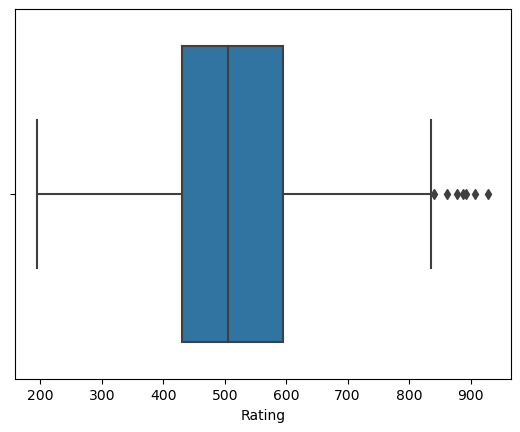

In [731]:
sn.boxplot(final_df["Rating"])

From the above plot we can say that
- 75% of players rating is above 450 and in between 25-50%,50% of players rating is above 520 and 25% of players rating is above 600.
- There are more players with rating in between 520 to 620.
- There are seven outliers in the Rating Series.
- Statistical Measures:
    - Minimum(LB)-188.25
    - First Quartile(Q1)-432.0
    - Median(Second Quartile(Q2))-504.0
    - Third Quartile(Q3)-594.5
    - Maximum(UP)-838.25
    - IQR(Q3-Q1)-133.0

# To find the density of players rating we are using distribution plot in All three formats.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

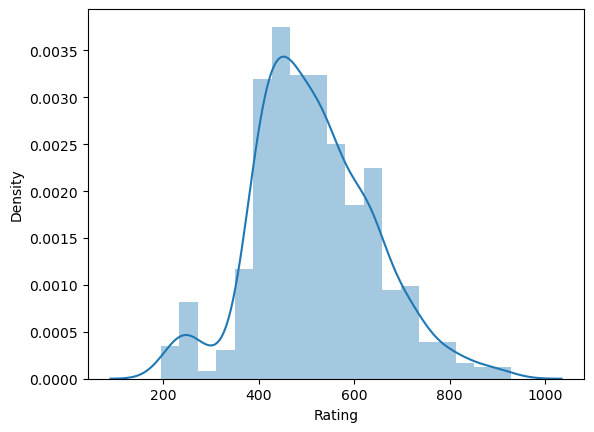

In [732]:
 sn.distplot(final_df["Rating"])

From the above plot we can say that
- There are more players with rating in between 400 to 600,the density is high.
- There are less players with rating>900.

# To find the density of players rating we are using distribution plot in three different formats.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='Rating', ylabel='Density'>

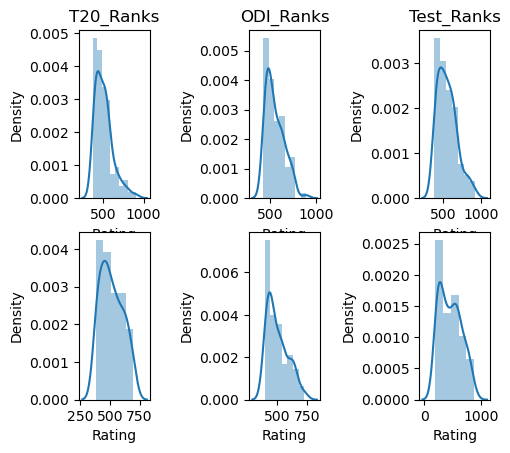

In [733]:
plt.subplot(2,6,1)
plt.title("T20_Ranks")
sn.distplot(data1["Rating"])
plt.subplot(2,6,3)
plt.title("ODI_Ranks")
sn.distplot(datac["Rating"])
plt.subplot(2,6,5)
plt.title("Test_Ranks")
sn.distplot(datay["Rating"])
plt.subplot(2,6,7)
sn.distplot(df["Rating"])
plt.subplot(2,6,9)
sn.distplot(df1["Rating"])
plt.subplot(2,6,11)
sn.distplot(df3["Rating"])

# To find how many LH,RH batmans and RA,LA bowlers in All formats we are using piechart.

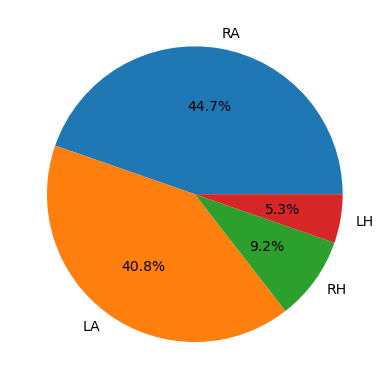

In [734]:
plt.pie(final_df.Style.value_counts(),labels=final_df.Style.unique(),autopct="%0.1f%%")
plt.show()

From the above plot we can say that
- There are more RH Style players  with 44.7% than LH style Batsmans.
- There are more RA Style bowlers with 9.2% comapared with LA Style Bowlers.

# Single Categorical Column plots

# To find the how many Players are LH,RH batsmans and LA,RA bowlers in All three formats we are using barplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

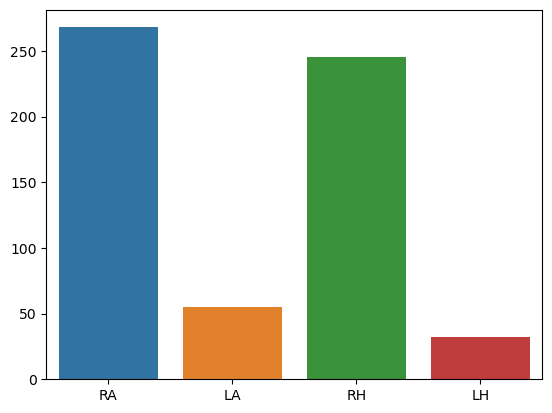

In [735]:
sn.barplot(final_df["Style"].unique(),[268,55,245,32])

In [736]:
final_df["Style"].value_counts()

RA    268
RH    245
LH     55
LA     32
Name: Style, dtype: int64

From the above plot we can say that
- There are 268 RA style bowlers.
- There are 32 LA style bowlers.
- There are 245 RH style batsmans.
- There are 55 LH style batsmans.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Style'>

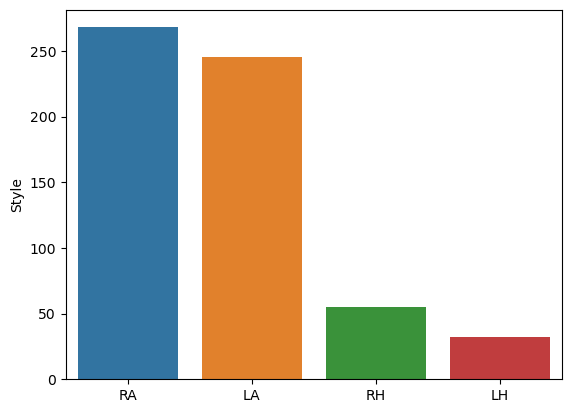

In [737]:
sn.barplot(final_df.Style.unique(),final_df.Style.value_counts())

From the above plot we can say that
- There are 268 RA style bowlers.
- There are 32 LA style bowlers.
- There are 245 RH style batsmans.
- There are 55 LH style batsmans.

# To find the how many Players are LH,RH batsmans and LA,RA bowlers in  three different formats we are using countplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

<AxesSubplot:xlabel='Style', ylabel='count'>

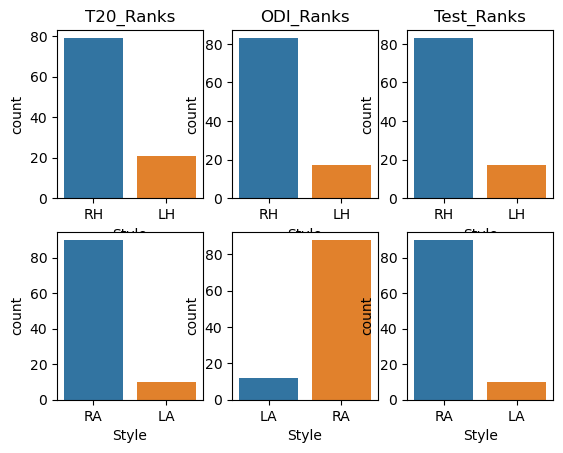

In [738]:
plt.subplot(2,3,1)
plt.title("T20_Ranks")
sn.countplot(data1["Style"])
plt.subplot(2,3,2)
plt.title("ODI_Ranks")
sn.countplot(datac["Style"])
plt.subplot(2,3,3)
plt.title("Test_Ranks")
sn.countplot(datac["Style"])
plt.subplot(2,3,4)
sn.countplot(df["Style"])
plt.subplot(2,3,5)
sn.countplot(df1["Style"])
plt.subplot(2,3,6)
sn.countplot(df3["Style"])

In [739]:
final_df.Team.value_counts()[:10].sort_values()

Afghanistan     26
West Indies     42
Bangladesh      43
South Africa    47
New Zealand     48
Sri Lanka       48
Australia       49
Pakistan        50
England         59
India           61
Name: Team, dtype: int64

In [740]:
final_df.Team.unique()[3:9]

array(['Australia', 'South Africa', 'New Zealand', 'West Indies',
       'Pakistan', 'India'], dtype=object)

# To find which Team players are more in All three formats we are using countplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

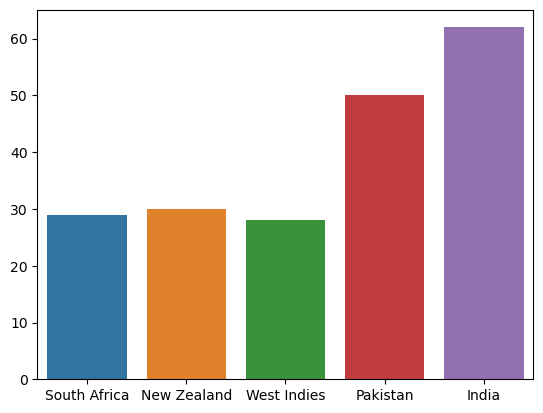

In [741]:
sn.barplot(final_df.Team.unique()[4:9],[29,30,28,50,62])

From the above plot we can say that
- In all three format Rankings more number of players belongs to India compared to other teams.
- Less number of players belongs to Nepal,United Arab Emirates,Canada

# Bivariate plots:
Plotting two variables one on horizontal axis and the other on vertical axis.

1. Numerical vs Numerical plots
 - Scatter plot
 - Line Plot
2. Categorical vs Numerical plots
 - Violin plot
 - Boxplot
3. Categorical vs Categorical plots
 - Crosstab with bargraph

# Numerical vs Numerical plots.

# To find the relation between two variables i.e, how ranks and CareerBestRating are related in All three formats we are using scatterplot

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank', ylabel='CareerBestRating'>

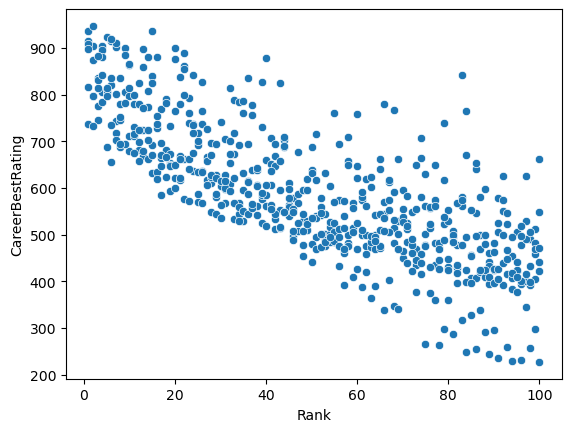

In [742]:
sn.scatterplot(final_df["Rank"],final_df["CareerBestRating"])


From the above plot we can say that
- In between 0 t0 40 ranks, players they have high CareerbestRating.
- In between 80 to 100 ranks,players have very less CareerbestRating.
- We can observe that as the Ranks of players increases corresponding their CarrerBestRating decreses.
- Finally we can conclude that Rank and CareerBestRating are negetively correlated.

# To find the relation between two variables i.e, how ranks and rating are related in All three formats we are using Lineplot

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank', ylabel='Rating'>

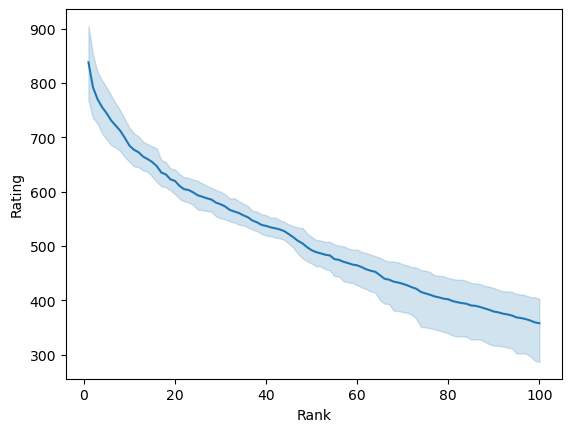

In [743]:
sn.lineplot(final_df["Rank"],final_df["Rating"])

From the above plot we can say that
- As the Rank is increasing the rating of players are decreasing,They are negetively correlated.

# Categorical vs Numerical plots.

# To know the outliers and statistical measures along with density we are using violinplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


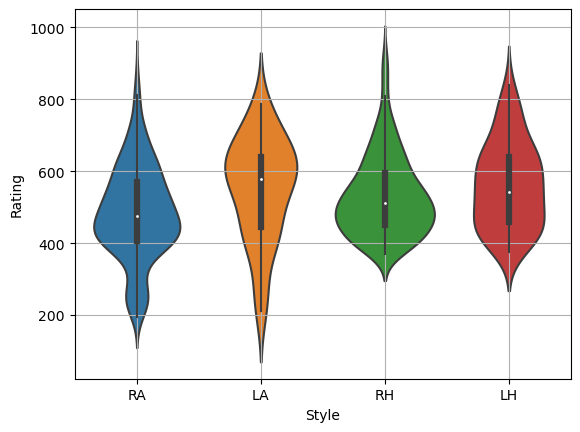

In [744]:
sn.violinplot(final_df["Style"],final_df["Rating"])
plt.grid()

From the above plot we can say that
- In between 400 to 600 the density of RA style bowlers is more compared to LH style bowlers.
- In between 550 to 650 range the density of LA style bowlers is high.
- In between 400 to 500 the density of RH style batsmans is more and there are no RH style batsmans below 300.
- In between 400 to 600 the density of LH Bowlers is more.


# To find the outliers of we are using Boxplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Style', ylabel='Rating'>

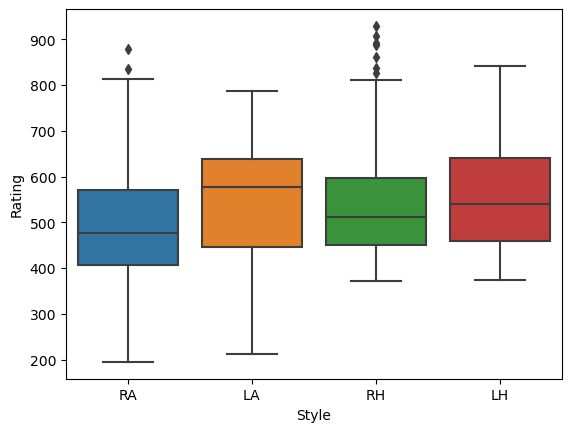

In [745]:
sn.boxplot(final_df["Style"],final_df["Rating"])

from the above plot we can say that
- There is only one outlier in RA style bowlers rating,
- There are more outliers in RH style batsmans rating.

# To know the relationship how rank and rating are related in All three formats we are using scatterplot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rank', ylabel='Rating'>

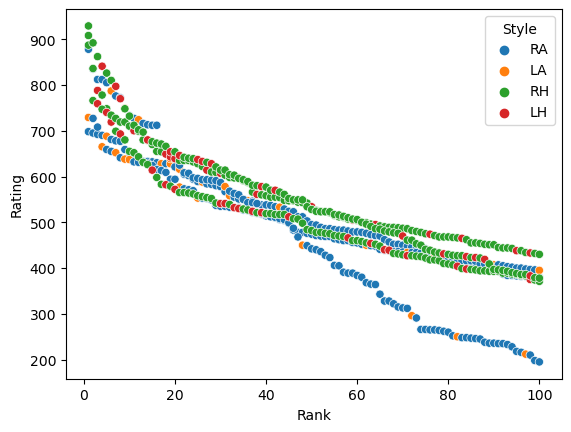

In [746]:
sn.scatterplot(final_df["Rank"],final_df["Rating"],hue=final_df["Style"])

From the above plot we can say that
- As the rank increases the rating is decreasing.So,tthey are negetively correlated.
- Finally we can say that the players with below 20 ranks has more ratings compared to above 60.

# To know the relation between Rating and Rank in different formats we are using scatter plot.

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

<AxesSubplot:xlabel='Rank', ylabel='Rating'>

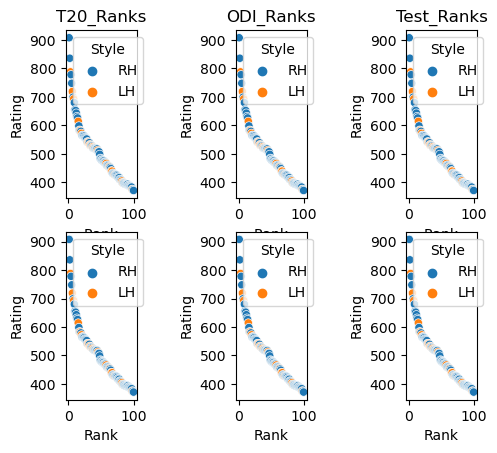

In [747]:
plt.subplot(2,6,1)
plt.title("T20_Ranks")
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])
plt.subplot(2,6,3)
plt.title("ODI_Ranks")
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])
plt.subplot(2,6,5)
plt.title("Test_Ranks")
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])
plt.subplot(2,6,7)
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])
plt.subplot(2,6,9)
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])
plt.subplot(2,6,11)
sn.scatterplot(data1["Rank"],data1["Rating"],hue=data1["Style"])

In [748]:
final_df.corr()

,Rank,Rating,CareerBestRating
Rank,1.000000,-0.897342,-0.778326
Rating,-0.897342,1.000000,0.867483
CareerBestRating,-0.778326,0.867483,1.000000


# To find the correlation between two entites(variables) we are using heatmap.

<AxesSubplot:>

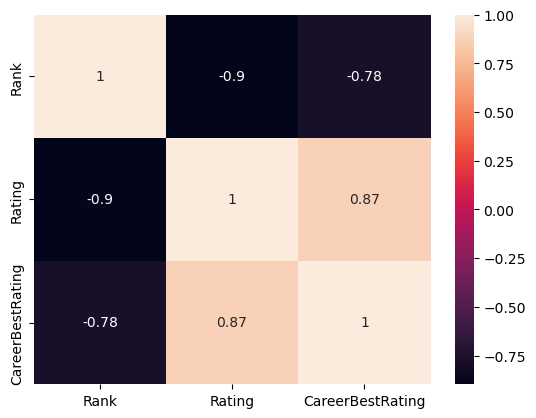

In [749]:
sn.heatmap(final_df.corr(),annot=True)

From the above plot we can say that
- Rank and CareerBestRating are negetively correlated means as Rank is increasing CareerBestRating of players is decreasing,
- Rank and Rating are negetively correlated means as Rank is increasing Rating of players is decreasing,
- Rating and CareerBestRating are positively correlated means as Rating is increasing CareerBestRating of players also increasing.
- Rating and Rank are negetively correlated means as Rating is increasing Rank of players decreasing.
- CareerBestRating and Rating are positively correlated means as CareerBestRating is increasing Rating of players also increasing 
- CareerBestRating and Rank are negetively correlated means as CareerBestRating is increasing Rank of players decreasing.

# Categorical vs Categorical

In [760]:
y=pd.crosstab(data1["Style"],data1["Team"])
y

Team,Afghanistan,Australia,Bangladesh,Canada,England,Guinea,India,Ireland,Namibia,Nepal,Netherlands,New Zealand,Oman,Pakistan,Scotland,South Africa,Sri Lanka,United Arab Emirates,West Indies,Zimbabwe
Style,,,,,,,,,,,,,,,,,,,,
LH,1,1,3,0,3,0,1,1,0,1,0,1,1,0,2,2,1,1,2,0
RH,5,5,3,3,6,3,7,3,4,1,3,5,1,5,2,6,5,3,4,5


# Bargraph using crosstab to know in which team there are more RH,LH Style batsmans.

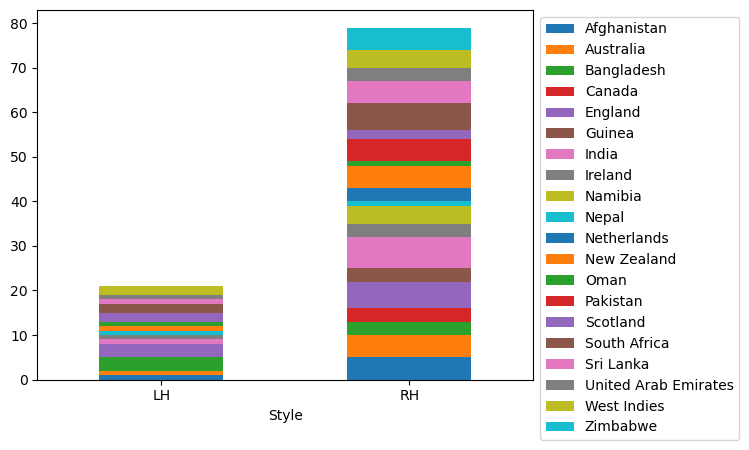

In [761]:
y.plot(kind="bar",stacked=True,rot=0)
plt.legend(bbox_to_anchor=(1.0,1.0))

From the above plot we can say that
- There are more RH style players in India compared to other teams.
- There are more LH style players England compared to other teams.

# Observations:
Scatterplot & Heatmap:
- From the above analysis we can infer that players below rank 20 have high rating compared to others.So,we can
  say that as the rank is increasing the rating of batsmans and bowlers is falling down,

- To be in Top 10 rankings the player should maintain stability on rating by scoring runs.

Bargraph & Countplot:
- From the above  analysis we can infer that there are more players in indian team in all formats of cricket compared
  to other teams.

- There are more RH,RA style batsmans and bowlers in Rankings compared to LH,LA style batsmans and bowlers.

Densityplot & violinplot:
- From the above analysis we can infer that players rating is more in between 400 to 600 and less above  850.

- Therefore we can predict that in between 400 to 600 we can see more players ratings.

# Conclusion:

The project aim is to analyze the rankings and ratings in all three formats of cricket

- From above analysis we can conclude that if more  players are involved in rankings  then
  there team popularity increases and that team will be in good position in ICC Cricket Ramkings


- We can also predict if the players maintains a rating above 800 there will high chances to be in 
  Top 10 Rankings in all three formats of cricket.


- This way we can analyse the areas of improvement of players to have better ranks and rating in 
  all three formats of cricket.

